# Human Activity Recognition with Smartphones

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm



%matplotlib inline

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [65]:
print('Training dataset shape: ', train.shape)
print('Test dataset shape: ', test.shape)
print('-'*40)
print('Training set Null values:', train.isnull().values.any())
print('Test set Null values:\t', test.isnull().values.any())


Training dataset shape:  (7352, 564)
Test dataset shape:  (2947, 564)
----------------------------------------
Training set Null values: False
Test set Null values:	 False


In [66]:
train['Data'] = 'Train'
test['Data'] = 'Test'
df = pd.concat([train,test], axis=0).reset_index(drop=True)



In [119]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [118]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


# EDA 

<IPython.core.display.Javascript object>


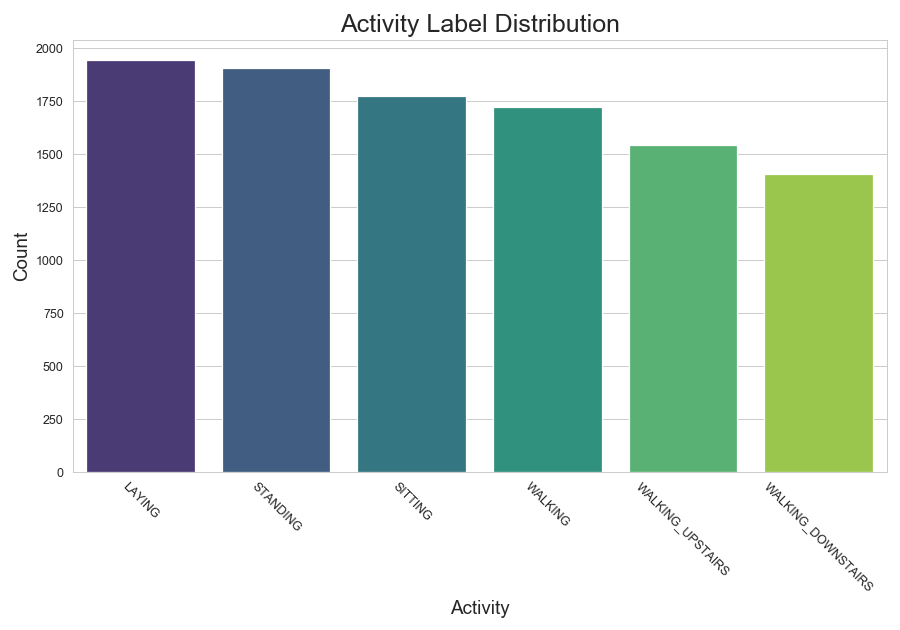

In [53]:
%matplotlib notebook
plt.figure(figsize=(10,7))
chart = sns.countplot(df['Activity'], order= df['Activity'].value_counts().index, palette='viridis')
chart.set_xticklabels(df['Activity'].value_counts().index,rotation=-45);
plt.xlabel('Activity', size=15)
plt.ylabel('Count', size=15)
plt.title('Activity Label Distribution', size=20)
plt.tight_layout()

In [54]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [106]:
df.columns.str.replace('[-(].*', '').value_counts() # regex to remove everthing after - and ( in the string. 

fBodyAccJerk            79
fBodyAcc                79
fBodyGyro               79
tBodyAcc                40
tBodyGyroJerk           40
tGravityAcc             40
tBodyAccJerk            40
tBodyGyro               40
tBodyGyroJerkMag        13
fBodyBodyAccJerkMag     13
fBodyBodyGyroJerkMag    13
fBodyBodyGyroMag        13
tBodyAccJerkMag         13
tGravityAccMag          13
tBodyGyroMag            13
fBodyAccMag             13
tBodyAccMag             13
angle                    7
Activity                 1
subject                  1
Data                     1
dtype: int64

In [173]:
feature_cols = df.columns[: -3]   
#Calculate the correlation values

corr = train[feature_cols].corr()

corr =corr.stack().reset_index().rename(columns={'level_0':'Feature-1', 'level_1':'Feature-2', 0:'Corr'})
corr.sort_values(by='Corr', ascending=False).head(10)

,Feature-1,Feature-2,Corr
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.0
114648,tBodyAccMag-min(),tBodyAccMag-min(),1.0
114086,tBodyAccMag-max(),tBodyAccMag-max(),1.0
113537,tBodyAccMag-mad(),tGravityAccMag-mad(),1.0
113524,tBodyAccMag-mad(),tBodyAccMag-mad(),1.0
112975,tBodyAccMag-std(),tGravityAccMag-std(),1.0
112962,tBodyAccMag-std(),tBodyAccMag-std(),1.0
112418,tBodyAccMag-mean(),tGravityAccMag-sma(),1.0
112413,tBodyAccMag-mean(),tGravityAccMag-mean(),1.0
112405,tBodyAccMag-mean(),tBodyAccMag-sma(),1.0


In [175]:
corr[corr['Feature-1'] != corr['Feature-2']].sort_values(by='Corr', ascending=False).head(10)

,Feature-1,Feature-2,Corr
118595,tBodyAccMag-arCoeff()3,tGravityAccMag-arCoeff()3,1.0
119711,tGravityAccMag-mean(),tGravityAccMag-sma(),1.0
123627,tGravityAccMag-iqr(),tBodyAccMag-iqr(),1.0
116347,tBodyAccMag-iqr(),tGravityAccMag-iqr(),1.0
282129,fBodyAccMag-mean(),fBodyAccMag-sma(),1.0
123065,tGravityAccMag-energy(),tBodyAccMag-energy(),1.0
122511,tGravityAccMag-sma(),tGravityAccMag-mean(),1.0
122503,tGravityAccMag-sma(),tBodyAccMag-sma(),1.0
122498,tGravityAccMag-sma(),tBodyAccMag-mean(),1.0
121941,tGravityAccMag-min(),tBodyAccMag-min(),1.0


### Types of Features

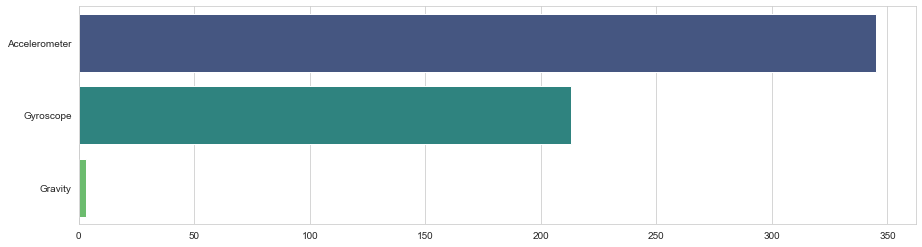

In [64]:
sensors = {'Accelerometer': 0 , 'Gyroscope' : 0, 'Gravity': 0}
features_names = list(df.columns)
for feat in features_names:
    if 'Acc' in feat:
        sensors['Accelerometer'] += 1
    elif 'Gyro' in feat:
        sensors['Gyroscope'] += 1
    elif 'gravity' in feat:
        sensors['Gravity'] += 1

sns.set_style('whitegrid')
plt.figure(figsize=(15,4))
sns.barplot(list(sensors.values()), list(sensors.keys()), palette='viridis');


### Duration of Measurement for Each Participant
Each datapoint is fixed-width sliding windows of 2.56 sec and 50% overlap, so single datapoin is at 1.28sec intervals.

Text(0.5, 1.0, 'Duration of Measurement for Each Participant')

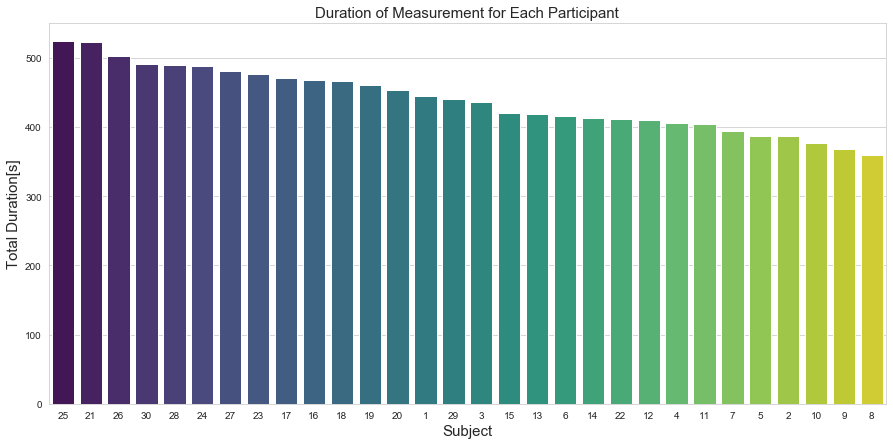

In [61]:
#(df.groupby('subject')['Data'].count()*1.28).plot(kind='bar')

duration = (df.groupby('subject')['Data'].count()*1.28).sort_values(ascending=False)

sns.set_style('whitegrid')
plt.figure(figsize=(15,7))

sns.barplot(y=duration,x=duration.index, order=duration.index, palette='viridis')
plt.ylabel('Total Duration[s]',size=15);
plt.xlabel('Subject',size=15);
plt.title('Duration of Measurement for Each Participant', size=15)

## Measurment time for each activity

Each datapoint is fixed-width sliding windows of 2.56 sec and 50% overlap, so single datapoin is at 1.28sec intervals.

Datapoints are against each subject hence need to be aggregated for each and averaged and factored by 1.28

,Data
Activity,
LAYING,82.944000
STANDING,81.322667
SITTING,75.818667
WALKING,73.472000
WALKING_UPSTAIRS,65.877333
WALKING_DOWNSTAIRS,59.989333


Text(0.5, 1.0, 'Measurement Time by Each Activity')

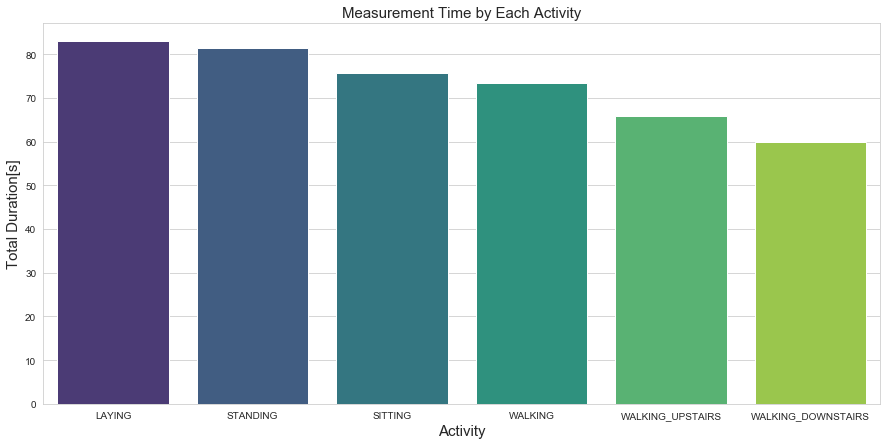

In [83]:
sub = df.copy()

dur  = sub.groupby(['Activity', 'subject'])['Data'].count().reset_index().groupby('Activity')['Data'].agg(np.mean)*1.28
dur = pd.DataFrame(data=dur, columns=['Data'])

dur.sort_values(by='Data', inplace=True, ascending=False)
plt.figure(figsize=(15,7))


sns.barplot(y=dur['Data'], x=list(dur.index), palette='viridis')
plt.ylabel('Total Duration[s]',size=15);
plt.xlabel('Activity',size=15);
plt.title('Measurement Time by Each Activity', size=15)

## Dimensionality Reduction using PCA, MDS and T-SNE

In [35]:
df.groupby('subject')['Data'].count()*1.28

subject
1     444.16
2     386.56
3     436.48
4     405.76
5     386.56
6     416.00
7     394.24
8     359.68
9     368.64
10    376.32
11    404.48
12    409.60
13    418.56
14    413.44
15    419.84
16    468.48
17    471.04
18    465.92
19    460.80
20    453.12
21    522.24
22    410.88
23    476.16
24    487.68
25    523.52
26    501.76
27    481.28
28    488.96
29    440.32
30    490.24
Name: Data, dtype: float64

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import time
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [9]:

mani_data = df.copy()

label_data = mani_data.pop('Activity')
data_data = mani_data.pop('Data')
subject_data = mani_data.pop('subject')


scaler = StandardScaler()
mani_data = scaler.fit_transform(mani_data)


pca = PCA(n_components=2, random_state=42)
mani_data_pca= pca.fit_transform(mani_data)


In [10]:
mani_data_pca = pd.DataFrame(data= mani_data_pca, columns =['PCA-1', 'PCA-2'])
mani_data_pca

,PCA-1,PCA-2
0,-16.380980,1.995084
1,-15.582173,1.182593
2,-15.423989,2.243167
3,-15.647807,3.762882
4,-15.842320,4.438896
...,...,...
10294,10.166057,-6.504224
10295,12.131154,-4.882447
10296,11.846853,-3.433565
10297,8.206686,-4.386490


In [49]:
print('Explained variation per PCA: ', pca.explained_variance_ratio_)

Explained variation per PCA:  [0.50738221 0.06239186]


In [7]:
def scatter_plot(X, label_data):
    

    sns.set_style('whitegrid')
    plt.figure(figsize=(10,8))
    plt.xlabel(X.columns[0], fontsize=20)
    plt.ylabel(X.columns[1], fontsize=20)

    plt.title ('2D Analysis of Human Activity Recognition', fontsize=20)

    target = list(label_data.unique())
    #color = ['r', 'g', 'y', 'b', 'o', 'db']

    colors = cm.rainbow(np.linspace(0, 1, len(target)))


    for t,col in zip(target,colors):
        mask = df['Activity'] == t
        sns.scatterplot(X.loc[mask, X.columns[0]], 
                   X.loc[mask, X.columns[1]], color= col, s=50);
    plt.legend(target)

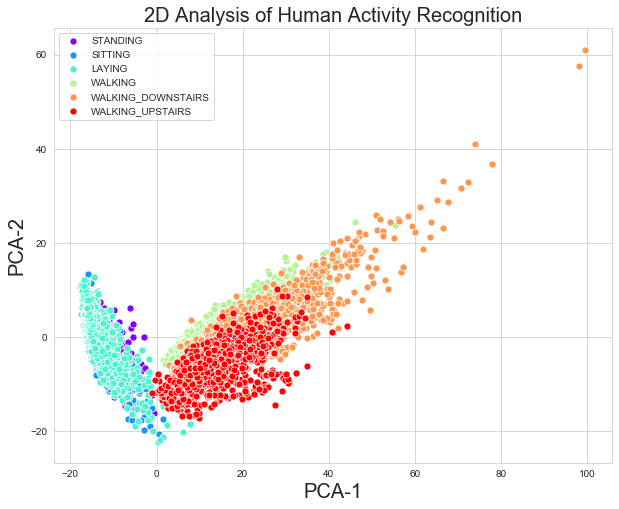

In [50]:
scatter_plot(mani_data_pca, label_data)

In [177]:
tsne_data = df.copy()

tsne_data.drop(columns=['Activity', 'Data', 'subject'], axis=1, inplace = True)
start_time = time.time()

tsne_data = TSNE(random_state=42).fit_transform(tsne_data)

print('T-SNE completed in : {} seconds'.format(time.time()-start_time))

T-SNE completed in : 244.67383742332458 seconds


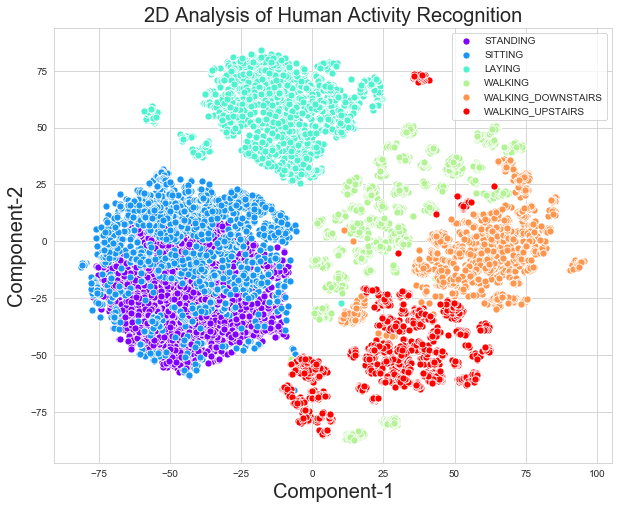

In [46]:
tsne_df= pd.DataFrame(data= tsne_data, columns =['Component-1', 'Component-2'])
scatter_plot(tsne_df, label_data)

In [10]:
start_time = time.time()

pca = PCA(n_components=50, random_state=42)
mani_data_mds= pca.fit_transform(mani_data)

mds = MDS(n_components=2, random_state=42)
mani_data_mds= mds.fit_transform(mani_data_mds)

print('MDS completed in : {} seconds'.format(time.time()-start_time))

MDS completed in : 8389.754402399063 seconds


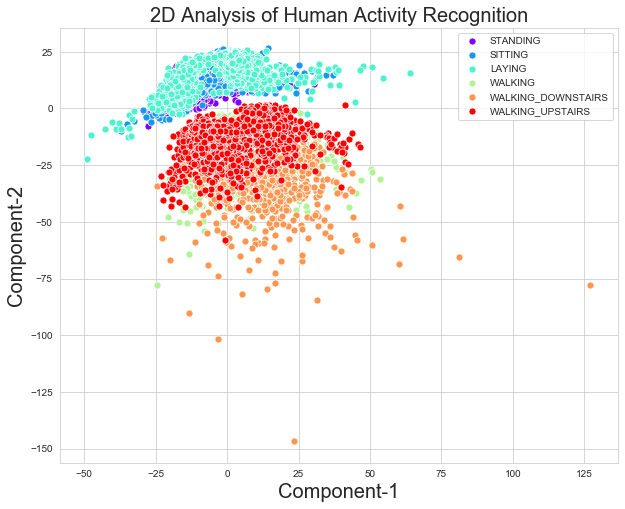

In [13]:
mds_df= pd.DataFrame(data= mani_data_mds, columns =['Component-1', 'Component-2'])
scatter_plot(mds_df, label_data)

## Basic Models

In [8]:
mani_data

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

In [148]:

le = LabelEncoder()
label_encoded = le.fit_transform(label_data)
mani_data = pd.DataFrame(mani_data, columns=df.columns[:-3])

X_train, X_test, y_train, y_test = train_test_split(mani_data, label_encoded, random_state=42)

# Create the model
lg = LogisticRegression( random_state=42)
lg.fit(X_train, y_train)

# Test the model
score = accuracy_score(y_true=y_test, y_pred=lg.predict(X_test))
print('Accuracy on test set:\t{:.4f}\n'.format(score))

Accuracy on test set:	0.9868



In [215]:
lg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [259]:
from sklearn.tree import DecisionTreeClassifier

nb = DecisionTreeClassifier()
nb.fit(X_train, y_train)

# Test the model
score = accuracy_score(y_true=y_test, y_pred=nb.predict(X_test))
print('Accuracy on test set:\t{:.4f}\n'.format(score))


Accuracy on test set:	0.9379



In [260]:
pd.DataFrame(nb.feature_importances_, index=df.columns[:-3]).sort_values(by=0, ascending=False)

,0
tGravityAcc-min()-X,0.231952
"fBodyAcc-bandsEnergy()-1,24",0.201456
tGravityAcc-max()-Y,0.127293
fBodyAccMag-energy(),0.103472
"tGravityAcc-arCoeff()-Y,1",0.096978
...,...
tGravityAccMag-entropy(),0.000000
tGravityAccMag-iqr(),0.000000
tGravityAccMag-energy(),0.000000
tGravityAccMag-sma(),0.000000


In [149]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train,y_train)

xgb_predict = xgb.predict(X_test)

score = accuracy_score(y_true=y_test, y_pred=xgb_predict)
print('Accuracy on test set:\t{:.4f}\n'.format(score))


Accuracy on test set:	0.9845



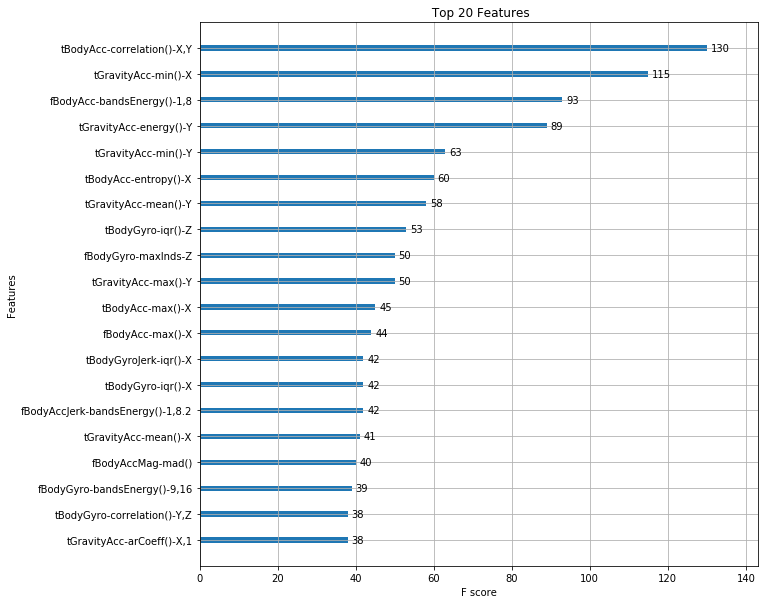

In [151]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1, figsize=(10,10))

fig = plot_importance(xgb, max_num_features=20, ax=ax);
plt.title(' Top 20 Features');

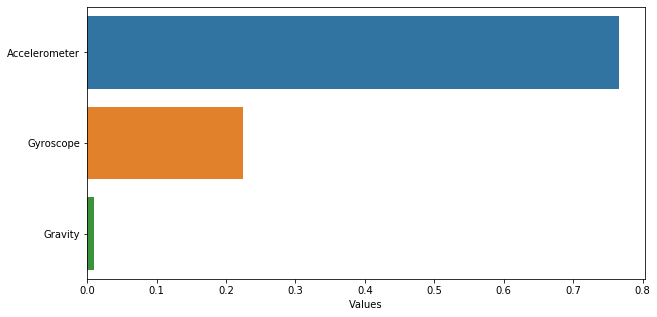

In [260]:
features = pd.DataFrame(data=xgb.feature_importances_, index=df.columns[:-3], columns=['Values'])
features.reset_index(inplace=True)
features.rename(columns={'index':'feature_name'}, inplace=True)
features['Sensor'] = 'Null'

features.loc[features['feature_name'].str.contains('Acc'), 'Sensor']= 'Accelerometer'
features.loc[features['feature_name'].str.contains('Gyro'), 'Sensor'] = 'Gyroscope'
features.loc[features['feature_name'].str.contains('gravity'), 'Sensor'] = 'Gravity'

ax, fig = plt.subplots(figsize=(10,5))
sns.barplot(y=features['Sensor'].unique(),
            x=features.groupby('Sensor')['Values'].agg(np.sum).sort_values(ascending=False))



In [17]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(random_state=42)

params = dict(
    max_depth=[3, 5, 8, 10],
    learning_rate=[0.001, 0.1, 1, 10, 1000],
    n_estimators=[100, 200, 300, 400,500], 
    colsample = [0.7, 0.8, 0.9, 1.0],
    subsample = [0.7, 0.8, 0.9, 1.0]
)

In [22]:
model = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=10, verbose=3, scoring = 'accuracy', cv=5, n_jobs=-1)

In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [21]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [56]:
df.subject.dtype

dtype('int64')

## Distinguish subjects based on Activities

In [63]:
sub = df.copy()

for act in df.Activity.unique():
    
    a = sub[sub['Activity'] == act]
    
    label_sub = a.pop('subject')
    data_sub = a.pop('Data')
    a['Activity'] = le.fit_transform(a['Activity'])
    
    pca = PCA(n_components=50, random_state=42)
    
    a_pca = pca.fit_transform(a)
    
    X_train, X_test, y_train, y_test = train_test_split(a_pca, label_sub, random_state=42)
    
    
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    
    predict= xgb.predict(X_test)
    
    score = accuracy_score(y_true=y_test, y_pred=predict)
    
    print('Subject prediction for Activity {} with Accuracy {:.4f}'.format(act, score ))
    print('\n')

Subject prediction for Activity STANDING with Accuracy 0.4172


Subject prediction for Activity SITTING with Accuracy 0.3753


Subject prediction for Activity LAYING with Accuracy 0.6173


Subject prediction for Activity WALKING with Accuracy 0.9420


Subject prediction for Activity WALKING_DOWNSTAIRS with Accuracy 0.8693


Subject prediction for Activity WALKING_UPSTAIRS with Accuracy 0.8912




So individuals are more distinguishable when they are in motion as opposed to still, which makes perfect sense. 